<a href="https://colab.research.google.com/github/Chanda92/CE888/blob/master/Assignment/Covariate%20Shift/2nd_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving train.csv to train.csv
User uploaded file "train.csv" with length 46690044 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [9]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving test.csv to test.csv
User uploaded file "test.csv" with length 11760955 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
## reading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [42]:
train.dtypes,test.dtypes

(id                      int64
 timestamp              object
 full_sq                 int64
 life_sq               float64
 floor                 float64
                        ...   
 mosque_count_5000       int64
 leisure_count_5000      int64
 sport_count_5000        int64
 market_count_5000       int64
 price_doc               int64
 Length: 292, dtype: object, id                      int64
 timestamp              object
 full_sq               float64
 life_sq               float64
 floor                   int64
                        ...   
 church_count_5000       int64
 mosque_count_5000       int64
 leisure_count_5000      int64
 sport_count_5000        int64
 market_count_5000       int64
 Length: 291, dtype: object)

In [0]:
## missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

In [0]:
## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')
for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

In [45]:
train.shape,test.shape

((30471, 292), (7662, 291))

In [0]:
## creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [0]:
## taking sample from training and test data
training = training.sample(7662, random_state=12)
testing = test.sample(7000, random_state=11)

In [0]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

In [49]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:
    score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=5,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

id 1.0
timestamp 0.9600739807475621
life_sq 0.8379808661760066
build_year 0.8021450685320805
kitch_sq 0.8946824165268239
hospital_beds_raion 0.8872081728395782
cafe_sum_500_min_price_avg 0.8462562754670163
cafe_sum_500_max_price_avg 0.846842405716534
cafe_avg_price_500 0.8470296578286526


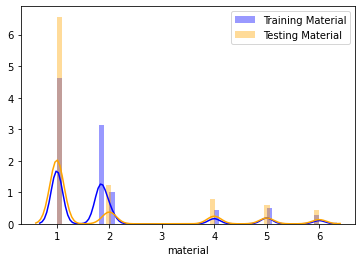

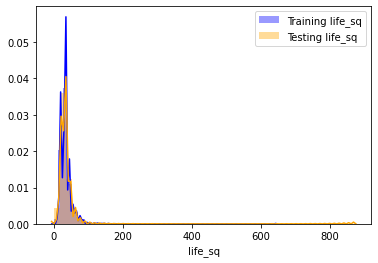

In [50]:
# Method 1: To identify the availability of covariate shift in the dataset
import seaborn as sns

# Plot the Neighborhood
sns.distplot( training["material"] , color="blue", label="Training Material")
sns.distplot( testing["material"] , color="orange", label="Testing Material")
plt.legend()
plt.show()

# Plot the Exterior2nd
sns.distplot( training["life_sq"] , color="blue", label="Training life_sq")
sns.distplot( testing["life_sq"] , color="orange", label="Testing life_sq")
plt.legend()
plt.show()


In [0]:
#We will Train our model with drift to check accuracy 

## taking sample from training and test data
train_drift = train.sample(7662, random_state=12)
test_drift = test.sample(7000, random_state=11)

# Label are the values we want to predict
label = np.array(train_drift['price_doc'])

# Remove the labels from the features
train_drift= train_drift.drop('price_doc', axis = 1)

# Saving feature names for later use
train_drift_list = list(train_drift.columns)

# Convert to numpy array
train_drift = np.array(train_drift);

In [0]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_drift, label, test_size = 0.25, random_state = 42)
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y);

In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 56.85 %.


In [0]:
## dropping certain drifting features which are not important.
drift_train = training.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)
drift_test = testing.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)


In [55]:
# Split the data into training and testing datasets into 75% and 25%
drift_train_x, drift_test_x, drift_train_y, drift_test_y =  train_test_split(drift_train, label, test_size = 0.25, random_state = 42)
# Instantiate model with 200 decision trees
drf = RandomForestRegressor(n_estimators = 100, random_state = 10)
# Train the model on training data
drf.fit(drift_train_x, drift_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [56]:

# Use the random forest's prediction method on the test dataset
drf_predictions = drf.predict(drift_test_x)

# Calculate the absolute errors
drf_errors = abs(drf_predictions - drift_test_y)

# Calculate mean absolute percentage error (MAPE)
drf_mape = 100 * (drf_errors / drift_test_y)

# Calculate and display accuracy
drf_accuracy = 100 - np.mean(drf_mape)
print('After Drift Accuracy:', round(drf_accuracy, 2), '%.')

After Drift Accuracy: 56.95 %.
